<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/BDonohue_DSC502_Actv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
import numpy as np
import math
import seaborn as sns
!pip install pandas-datareader
from pandas_datareader import data as pdr
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
from matplotlib.dates import DateFormatter

**Exercise 1**

In [ ]:
bb=pd.read_csv('https://storage.googleapis.com/scsu-data-science/brooklyn_bridge_pedestrians.csv')
bb

hour_beginning  pedestrians  to_manhattan  to_brooklyn  \
0     2017-10-01 00:00:00           44            30           14   
1     2017-10-01 01:00:00           30            17           13   
2     2017-10-01 02:00:00           25            13           12   
3     2017-10-01 03:00:00           20            11            9   
4     2017-10-01 04:00:00           18            10            8   
...                   ...          ...           ...          ...   
6571  2018-07-01 19:00:00         1547           850          697   
6572  2018-07-01 20:00:00         1568           661          907   
6573  2018-07-01 21:00:00         1019           320          699   
6574  2018-07-01 22:00:00          604           222          382   
6575  2018-07-01 23:00:00          285            89          196   

          weather_summary  temperature  precipitation events  
0             clear-night         52.0         0.0001    NaN  
1     partly-cloudy-night         53.0         0.0002    NaN  
2     partly-cloudy-night         52.0         0.0000    NaN  
3     partly-cloudy-night         51.0         0.0000    NaN  
4     partly-cloudy-night         51.0         0.0000    NaN  
...                   ...          ...            ...    ...  
6571            clear-day         90.0         0.0000    NaN  
6572            clear-day         88.0         0.0000    NaN  
6573          clear-night         85.0         0.0000    NaN  
6574          clear-night         84.0         0.0000    NaN  
6575          clear-night         83.0         0.0000    NaN  

[6576 rows x 8 columns]

In [ ]:
bb.head
#bb.shape

<bound method NDFrame.head of            hour_beginning  pedestrians  to_manhattan  to_brooklyn  \
0     2017-10-01 00:00:00           44            30           14   
1     2017-10-01 01:00:00           30            17           13   
2     2017-10-01 02:00:00           25            13           12   
3     2017-10-01 03:00:00           20            11            9   
4     2017-10-01 04:00:00           18            10            8   
...                   ...          ...           ...          ...   
6571  2018-07-01 19:00:00         1547           850          697   
6572  2018-07-01 20:00:00         1568           661          907   
6573  2018-07-01 21:00:00         1019           320          699   
6574  2018-07-01 22:00:00          604           222          382   
6575  2018-07-01 23:00:00          285            89          196   

          weather_summary  temperature  precipitation events  
0             clear-night         52.0         0.0001    NaN  
1     partly-cl

In [ ]:
bb.describe()

In [ ]:
print(bb)

In [ ]:
bb.shape

In [ ]:
total=bb['pedestrians'].sum()
print(total)

4316753


In [ ]:
bb2=bb.set_index(pd.DatetimeIndex(bb['hour_beginning'].values))
bb2.shape

(6576, 8)

In [ ]:
bb2.head

In [ ]:
total=bb2['pedestrians'].sum()
print(total)

4316753


In [ ]:
cross=bb2[['pedestrians','precipitation']]

daily=cross.resample('D').sum()
daily.head()
#daily.shape

In [ ]:
total=daily['pedestrians'].sum()
print(total)

In [ ]:
daily2=daily.loc[daily['precipitation']>0.25]
daily2.head

In [ ]:
bb3=bb2.loc[bb2['precipitation']>0.25]

In [ ]:
bb3.head

In [ ]:
Total=bb3['pedestrians'].sum()
print(Total)

949


In [ ]:
bb2.head

Text(0.5, 1.0, 'Relatioship between Pedestrian Crossings and Precipitation for Brooklyn Bridge')

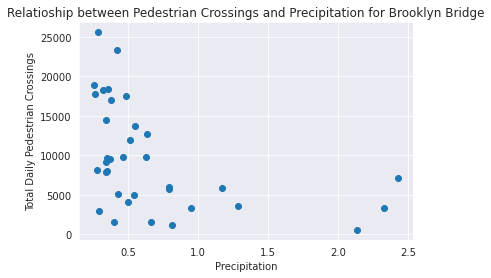

In [ ]:
fig=plt.figure()
ax=fig.add_subplot()

ax.scatter(daily2['precipitation'], daily2['pedestrians'])
ax.set_xlabel('Precipitation')
ax.set_ylabel('Total Daily Pedestrian Crossings')
ax.set_title('Relatioship between Pedestrian Crossings and Precipitation for Brooklyn Bridge')



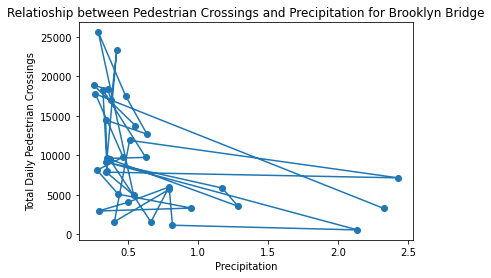

In [ ]:
fig=plt.figure()
ax=fig.add_subplot()

ax.scatter(daily2['precipitation'], daily2['pedestrians'])
ax.set_xlabel('Precipitation')
ax.set_ylabel('Total Daily Pedestrian Crossings')
ax.set_title('Relatioship between Pedestrian Crossings and Precipitation for Brooklyn Bridge')
ax.plot('precipitation','pedestrians',data=daily2)


Text(-8.825000000000003, 0.5, 'Total Daily Pedestrian Crossings')

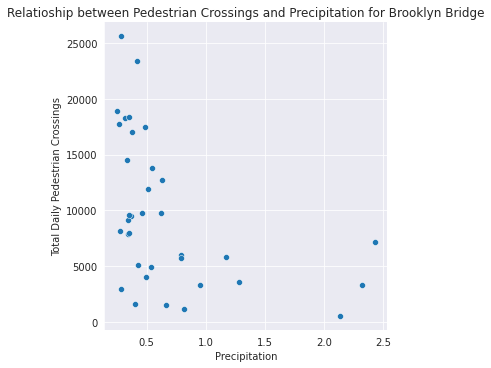

In [ ]:
sns.set_style('darkgrid')
sns.relplot(data=daily2, x='precipitation', y='pedestrians')

plt.title('Relatioship between Pedestrian Crossings and Precipitation for Brooklyn Bridge')
plt.xlabel('Precipitation')
plt.ylabel('Total Daily Pedestrian Crossings')


Text(-3.0749999999999886, 0.5, 'Total Daily Pedestrian Crossings')

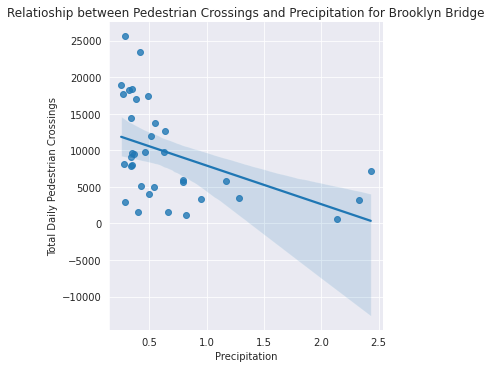

In [ ]:
sns.lmplot(x='precipitation', y='pedestrians',data=daily2)

plt.title('Relatioship between Pedestrian Crossings and Precipitation for Brooklyn Bridge')
plt.xlabel('Precipitation')
plt.ylabel('Total Daily Pedestrian Crossings')

**X Post (27Mar23) redo of Exercise 1:**

In [ ]:
import pandas as pd

url = 'https://storage.googleapis.com/scsu-data-science/brooklyn_bridge_pedestrians.csv'
df = pd.read_csv(url, index_col='hour_beginning', parse_dates=True)


In [ ]:
print(df.columns)

In [ ]:
url = 'https://storage.googleapis.com/scsu-data-science/brooklyn_bridge_pedestrians.csv'
df = pd.read_csv(url, index_col='hour_beginning', parse_dates=True)


In [ ]:
daily = df.resample('D').sum()


In [ ]:
daily = daily[daily['precipitation'] > 0.25]


In [ ]:
sns.regplot(x=daily['precipitation'], y=daily['pedestrians'])


In [ ]:
print(len(daily))


35


In [ ]:
plt.xlabel('Total Daily Precipitation (inches)')
plt.ylabel('Total Daily Pedestrian Crossings')
plt.title('Relationship between Daily Pedestrian Crossings and Precipitation')
plt.show()

**Exercise 2**

**2.1**

In [ ]:
 df1=pd.read_csv('https://storage.googleapis.com/scsu-data-science/google_stock_hist.csv')

In [ ]:
df1.head()


In [ ]:
df1.describe()

In [ ]:
df1.shape

In [ ]:
print(df1)

     symbol                       date   close      high       low    open  \
0      GOOG  2017-10-12 00:00:00+00:00  987.83  994.1200  985.0000  987.45   
1      GOOG  2017-10-13 00:00:00+00:00  989.68  997.2100  989.0000  992.00   
2      GOOG  2017-10-16 00:00:00+00:00  992.00  993.9065  984.0000  992.10   
3      GOOG  2017-10-17 00:00:00+00:00  992.18  996.4400  988.5900  990.29   
4      GOOG  2017-10-18 00:00:00+00:00  992.81  996.7200  986.9747  991.77   
...     ...                        ...     ...       ...       ...     ...   
1252   GOOG  2022-10-04 00:00:00+00:00  102.41  102.7200  101.0400  101.04   
1253   GOOG  2022-10-05 00:00:00+00:00  102.22  102.7400   99.7400  100.69   
1254   GOOG  2022-10-06 00:00:00+00:00  102.24  103.7300  101.5000  101.50   
1255   GOOG  2022-10-07 00:00:00+00:00   99.57  101.4200   99.2100  100.65   
1256   GOOG  2022-10-10 00:00:00+00:00   98.71   99.9900   97.8700   99.85   

        volume  
0      1259082  
1      1143907  
2       9007

In [ ]:
df2=df1.set_index(pd.DatetimeIndex(df1['date'].values))
print(df2)

                          symbol                       date   close      high  \
2017-10-12 00:00:00+00:00   GOOG  2017-10-12 00:00:00+00:00  987.83  994.1200   
2017-10-13 00:00:00+00:00   GOOG  2017-10-13 00:00:00+00:00  989.68  997.2100   
2017-10-16 00:00:00+00:00   GOOG  2017-10-16 00:00:00+00:00  992.00  993.9065   
2017-10-17 00:00:00+00:00   GOOG  2017-10-17 00:00:00+00:00  992.18  996.4400   
2017-10-18 00:00:00+00:00   GOOG  2017-10-18 00:00:00+00:00  992.81  996.7200   
...                          ...                        ...     ...       ...   
2022-10-04 00:00:00+00:00   GOOG  2022-10-04 00:00:00+00:00  102.41  102.7200   
2022-10-05 00:00:00+00:00   GOOG  2022-10-05 00:00:00+00:00  102.22  102.7400   
2022-10-06 00:00:00+00:00   GOOG  2022-10-06 00:00:00+00:00  102.24  103.7300   
2022-10-07 00:00:00+00:00   GOOG  2022-10-07 00:00:00+00:00   99.57  101.4200   
2022-10-10 00:00:00+00:00   GOOG  2022-10-10 00:00:00+00:00   98.71   99.9900   

                           

In [ ]:
df2.shape

(1257, 7)

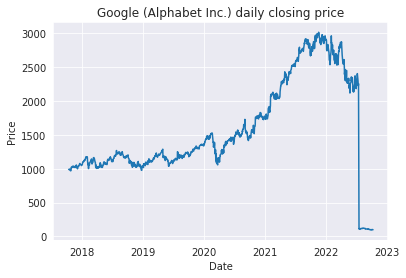

In [ ]:
plt.plot(df2['close'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google (Alphabet Inc.) daily closing price')

plt.show()

Below is an interactive plot for Google stock. It shows daily closing, opening, high and low prices. Google stock trading volume is also included.

In [ ]:
from matplotlib.axis import YAxis
figure=make_subplots(specs=[[{'secondary_y':True}]])

figure.add_trace(go.Candlestick(
    x=df2.index,
    low=df2['low'],
    high=df2['high'],
    close=df2['close'],
    open=df2['open']),
    secondary_y=True)

figure.add_trace(go.Bar(x=df2['date'],y=df2['volume']),
                 secondary_y=False)

figure.update_layout(
    title = 'Google (Alphabet Inc.)',
    yaxis_title = 'Google Volume/Price',
    xaxis_title='Date'
)





**2.2**

In [ ]:
wacp=df2[['close']].resample('W').mean()
wacp.head()

close
2017-10-15 00:00:00+00:00   988.755
2017-10-22 00:00:00+00:00   989.928
2017-10-29 00:00:00+00:00   980.830
2017-11-05 00:00:00+00:00  1023.462
2017-11-12 00:00:00+00:00  1031.682

In [ ]:
wacp.shape

(262, 1)

Text(0.5, 1.0, 'Google (Alphabet Inc.) Weekly Avg. Closing Price ')

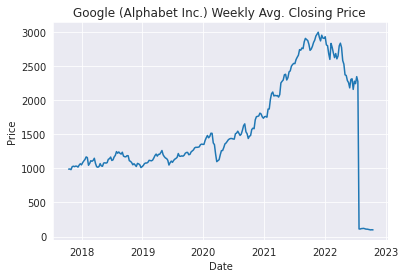

In [ ]:
plt.plot(wacp['close'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google (Alphabet Inc.) Weekly Avg. Closing Price ')

**2.3**

In [ ]:
macp=df2[['close']].resample('M').mean()
macp.head()

In [ ]:
macp.shape

In [ ]:
rolling=macp.rolling(30,center=True).mean()
rolling.head()

In [ ]:
print(rolling)

In [ ]:
daily=df2.resample('D').sum()

rolling=daily.rolling(30,center=True).mean()

rolling.loc['2017-10-12':'2017-12-12']

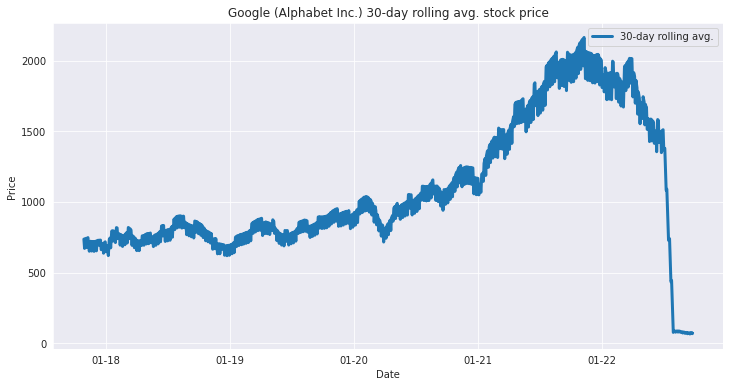

In [ ]:
fig=plt.figure(figsize=(12, 6))
ax=fig.add_subplot()

ax.plot(rolling.index,rolling['close'],
        label='30-day rolling avg.', linewidth=3)
ax.set_title('Google (Alphabet Inc.) 30-day rolling avg. stock price')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

date_form=DateFormatter('%m-%y')
ax.xaxis.set_major_formatter(date_form)
plt.legend()

**Exercise 3**

**3.1**

In [ ]:
df3=pd.read_csv('https://storage.googleapis.com/scsu-data-science/kc_house_data.csv')

In [ ]:
df3.head

In [ ]:
df3.describe()

In [ ]:
print(df3)

In [ ]:
import folium

lat_long=[47.64249,-122.2923]

map=folium.Map(location=[47.64249,-122.2923], zoom_start=13)

for index, row in df3.iterrows():
  loc=[row['lat'],row['long']]
  if row ['price']<350000:
       c=folium.Circle(radius=50,location=loc, color='green', fill=True)
  else:
     if row ['price']>700000:
       c=folium.Circle(radius=50,location=loc,color='blue', fill=True)
       c.add_to(map)


map

**Ex post (27Mar23) redo of Exercise 3:**

In [ ]:

import folium

# Load the data
url = "https://storage.googleapis.com/scsu-data-science/kc_house_data.csv"
df = pd.read_csv(url)

# Filter the data to only include houses with a price
# under $700,000
df = df[df.price <= 700000]

# Create the map with the initial lat/long values
m = folium.Map(location=[47.64249, -122.2923], zoom_start=12)

# Add markers to the map for each house
for i, row in df.iterrows():
    if row.price < 350000:
        color = 'green'
    elif row.price >= 350000 and row.price <= 700000:
        color = 'red'
    else:
        color = 'blue'
    folium.Marker(location=[row.lat, row.long], icon=folium.Icon(color=color)).add_to(m)

# Show the map
m



**Exercise 4**

In [ ]:
import pandas as pd
import numpy as np
df4=pd.read_csv('https://storage.googleapis.com/scsu-data-science/NYC_collisions.csv')

In [ ]:
#df4.head
print(df4)

      Unnamed: 0                 date   latitude  longitude  injuries  \
0              0  2017-03-28 00:00:00  40.894600 -73.861206         0   
1              1  2017-03-28 00:00:00  40.654080 -73.977610         0   
2              2  2017-03-28 00:00:00  40.583847 -73.940590         0   
3              3  2017-03-28 00:00:00  40.762770 -73.975590         0   
4              4  2017-03-28 00:00:00  40.713715 -73.731440         0   
...          ...                  ...        ...        ...       ...   
9995        9995  2017-03-12 18:30:00  40.544487 -74.176506         0   
9996        9996  2017-03-12 18:30:00  40.700123 -73.906220         1   
9997        9997  2017-03-12 18:33:00  40.592410 -73.972860         0   
9998        9998  2017-03-12 18:33:00  40.777530 -73.975006         0   
9999        9999  2017-03-12 18:35:00  40.643185 -73.949740         0   

                      contrib_factor  
0     Driver Inattention/Distraction  
1                        Unspecified  
2     

In [ ]:
df4.isna().sum()

Unnamed: 0          0
date                0
latitude          567
longitude         567
injuries            0
contrib_factor     69
dtype: int64

In [ ]:
lat_avg=df4['latitude'].mean()
df4['latitude']=df4['latitude'].replace(np.nan,lat_avg)

In [ ]:
long_avg=df4['longitude'].mean()
df4['longitude']=df4['longitude'].replace(np.nan,long_avg)

In [ ]:
import folium

lat_long=[40.75526,-73.97588]

map2=folium.Map(location=lat_long, zoom_start=12)

for index, row in df4.iterrows():
  loc=[row['latitude'], row['longitude']]
  if row['contrib_factor']:
    c=folium.Circle(radius=50, location=loc, color='red',fill=True)
    c.add_to(map2)

map2

A visual inspection of the above map indicates that most collosions in Manhattan occur on avenues as opposed to streets.

**X post (27Mar23) redo of Exercise 4:**